In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.fft import fft, fftfreq , ifft , fftshift

fourier transform of 1D heat equation
\begin{equation}
u(x,t) = \int_{-\infty}^{\infty} \frac{e^{-(x-y)^2/{4\alpha^2 t}}}{2\alpha \ sqrt(\pi t)} f(y) \,dy
\end{equation}
gaussian diffusion:
\begin{equation}
\frac{e^{-(x-y)^2/{4\alpha^2 t}}}{2\alpha \ sqrt(\pi t)}
\end{equation}

with numerical integral

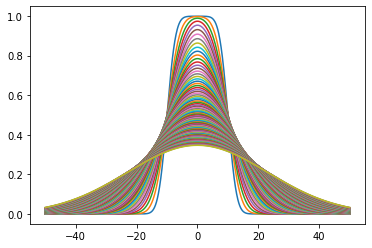

In [2]:
dx = 0.1
N = 1000
L = N*dx
x = np.linspace(-L/2, L/2, N)

f = 0 * x
f[int((L/2 - L/10)/dx):int((L/2 + L/10)/dx)] = 1

a = 5
y = x.copy()
dt = 0.1
u = np.zeros(N)
for i in range(1 ,  100):
    t = i*dt
    
    # for every fixed x:
    for j in range(N):
        xi = x[j]-y
        gxy = (1/(2*a*np.sqrt(np.pi*t)))*np.exp(-xi**2/(4*a*a*t))
        # integrate gxy*f for every x
        u[j] = np.dot(gxy, f)*dx
    
    fig =plt.plot(x, u)
plt.show()
    
        

with fft: the easier way of solving previous block

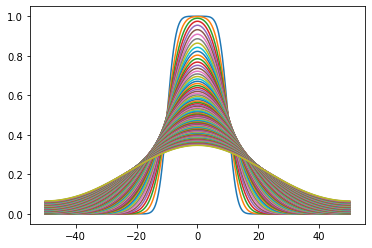

In [3]:
dx = 0.1
N = 1000
L = N*dx
x = np.linspace(-L/2, L/2, N)

f = 0 * x
f[int((L/2 - L/10)/dx):int((L/2 + L/10)/dx)] = 1

a = 5
fhat = fft(f)
dt = 0.1
# array of frequencies
kappa = fftfreq(N, d=1/N) * (2*np.pi/L)

for i in range(1 ,  100):
    t = i*dt
    uhat = np.exp(-(a**2)*(kappa**2)*t) * fhat
    u = ifft(uhat)
    plt.plot(x, abs(u))
    
plt.show()
    

Solution with FFT is way more faster

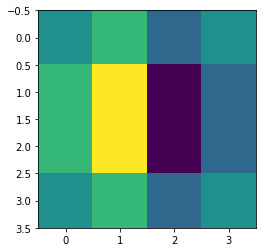

In [4]:
# visualazation of a matrix for fun
a = np.array([[0,1,-1,0],
         [1,3,-3,-1],
         [1,3,-3,-1],
         [0,1,-1,0],])
fig, axarr = plt.subplots()
axarr.imshow(a)

# Differentiation with fourier

\begin{equation}
f(x) = cos(x) * exp(\frac{x^2}{25})
\end{equation}

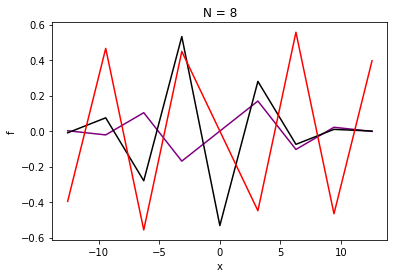

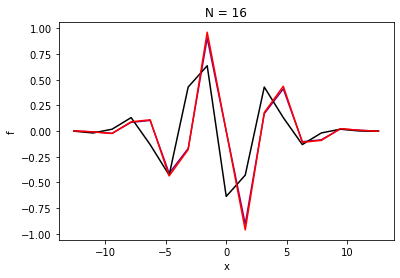

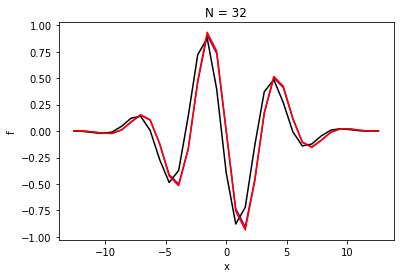

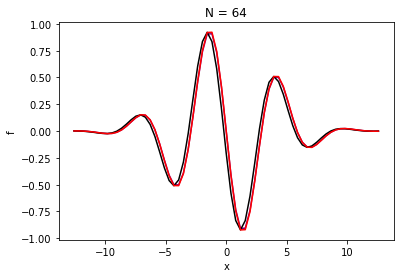

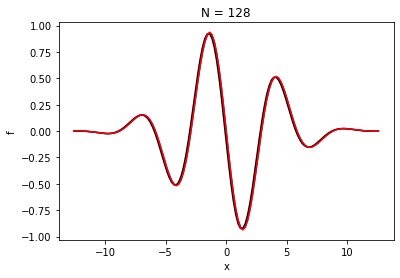

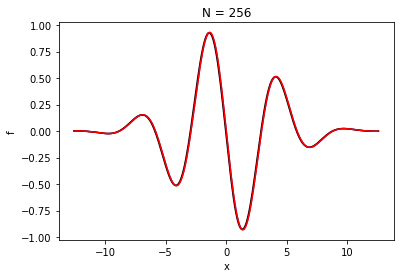

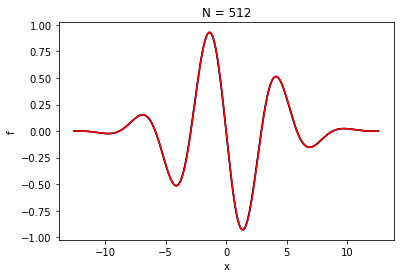

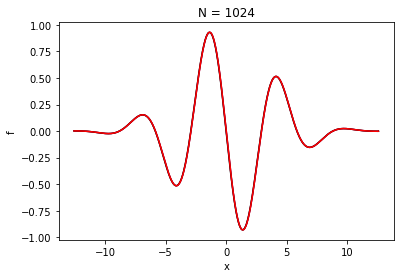

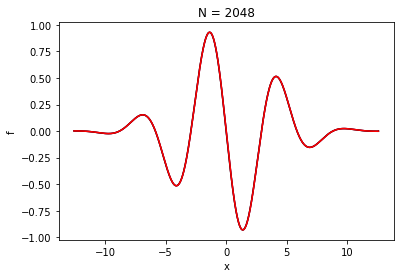

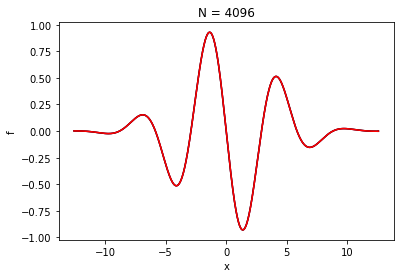

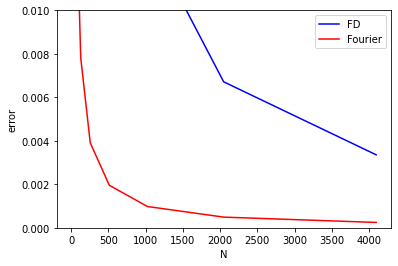

In [5]:

errFD = np.array([])
errFourier = np.array([])
Nvec = np.array([8,16,32,64,128,256,512,1024,2048,4096])
for N in Nvec:
    L = 8*np.pi
    dx = L/N
    x = np.linspace(-L/2, L/2, N+1)
    f = np.cos(x)*np.exp(-(x**2)/25)
    df = -(np.sin(x)*np.exp(-(x**2)/25)+np.cos(x)*(2/25)*x*np.exp(-(x**2)/25))
    Nx = max(np.shape(f))
    plt.plot(x, df,'purple')
    
    # discrete derivative
    dfFD = np.zeros(Nx)
    for i in range(Nx-1):
        dfFD[i] = (f[i+1]-f[i])/(dx)
    plt.plot(x, dfFD, 'black')
    errFD = np.append(errFD, np.linalg.norm(dfFD-df)/np.linalg.norm(df))
    
    # spectral differentiation
    k = fftfreq(N+1, d=1/(N+1)) * (2*np.pi/L) # array of frequencies
    dfspec = ifft(1j*k*fft(f)).real           # spectral differentiation
    
    errFourier = np.append(errFourier, np.linalg.norm(dfspec-df)/np.linalg.norm(df))
    plt.plot(x, dfspec, 'r')
    plt.title('N = ' + str(N))
    plt.xlabel('x')
    plt.ylabel('f')
    plt.show()
    
plt.plot(Nvec, errFD, 'b')
plt.plot(Nvec, errFourier, 'r')
plt.xlabel('N')
plt.ylabel('error')
plt.legend(['FD', 'Fourier'])
plt.ylim([0,0.01])
plt.show()

Fourier diffrentiation is way more accurate